# Prediction Using Supervised ML
* We have to Predict the percentage of an student based on the no. of study hours.
* This is a simple linear regression task as it involves just 2 variables.
* We are using Python with scikit-learn library for solution.
* Dataset can be found at <a target="_blank" href="http://bit.ly/w-data">Click here.</a>
* Finally we have to answer the question - What will be predicted score if a student studies for 9.25 hrs/ day?

### Author - Ansari Mohammed Ali Nasim
## Loading the dataset

In [1]:
#loading important libraries

import pandas as pd  #for loading dataset
import numpy as np  #for numerical computation
import matplotlib.pyplot as plt  #for visualization
from sklearn.model_selection import train_test_split  #for splitting the data
from sklearn.linear_model import LinearRegression  #for training the model
from sklearn.metrics import mean_squared_error  #for evaluation

In [2]:
#loading dataset

csv_file = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(csv_file)

#printing first five rows of the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


From the head, we find that there are two numerical variable i.e. hours and scores. Hours is continous numerical varialble and Score is discrete numerical variable. Since they are already in the numerical form, No need to change the types of variable and the model we will be using is Simple Linear Regression 

Lets us find more info about the dataset

In [3]:
#printing info about the dataset
df.info()

#printing the shape of the dataset
print("Shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
Shape: (25, 2)


As there is not any null value available we are having a good dataset to be trained and the shape of the dataset is 25 values of each 2 variables.

In [4]:
#looking at the statistics of the dataset

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


From the statistics, the hours is dispursed in range:1 to 10 whereas score is dispursed in range:17 to 95
## Visualization 
Since the dataset is in good form, we are directly moving the visualization part 

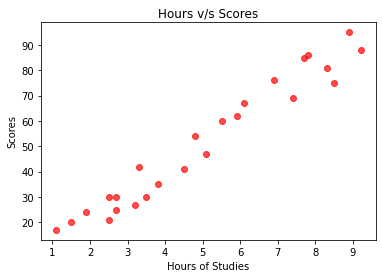

In [5]:
plt.scatter(df.Hours, df.Scores, alpha=0.7, c='red', cmap="rdBu")
plt.title("Hours v/s Scores")
plt.xlabel('Hours of Studies')
plt.ylabel('Scores')
plt.show()

It is clear from the scatter plot that the relationship between hours and score is linear. Means as the hours of studies increases the chances of getting good score increases and vice versa.
## Preparing the data
Preparing the data for fitting into the model for training. First we will separate independant and dependant variables and then we will split the data into train and test

In [6]:
#initialising the X and Y variable
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=42)

## Training the model
We are moving to finally training the model using the simple linear regression by loading the scikit-learn library

In [8]:
#initialising the model

model = LinearRegression()

In [9]:
#training the model
model.fit(X_train, Y_train)

LinearRegression()

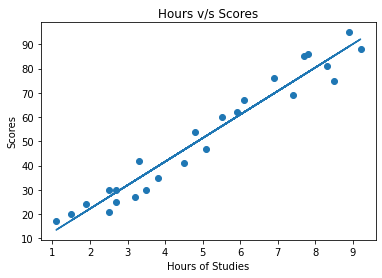

In [10]:
#Visualizing the model
line = model.coef_ * X + model.intercept_  #from the definition of line:y=mx+c
plt.scatter(X, Y)
plt.plot(X, line)
plt.title("Hours v/s Scores")
plt.xlabel('Hours of Studies')
plt.ylabel('Scores')
plt.show()

The line is linear regression line which predicts the result
## Making Prediction
So lets see how our model works on the test data

In [11]:
# checking prediction on test data
y_pred_on_test = model.predict(X_test)
test = pd.DataFrame({"Predicted": y_pred_on_test, "Actual": Y_test})
test.head()

,Predicted,Actual
0,83.391686,81
1,27.070549,30
2,27.070549,21
3,69.796929,76
4,60.086388,62


In [12]:
# checking prediction on train data
y_pred_on_train = model.predict(X_train)
train = pd.DataFrame({"Predicted": y_pred_on_train, "Actual": Y_train})
train.head()

,Predicted,Actual
0,39.694252,35
1,17.360008,20
2,33.867928,27
3,46.491631,41
4,89.218011,95


## Testing the data
So our model is looking good on test and train data. Lets check the question to be answer by giving a new input to the model and see the result 

Question - What will be predicted score if a student studies for 9.25 hrs/ day?

In [13]:
#taking input
hours = 9.5

#converting input into numpy array
hours_np = np.asarray(hours)

#reshaping the data to be fit into the model
hours_reshape = hours_np.reshape(-1, 1)

#Predicting the result
result = model.predict(hours_reshape)
print(
    f"If Student Studies for {hours}hrs/day then the predicted score will be {round(result[0],2)}%"
)

If Student Studies for 9.5hrs/day then the predicted score will be 95.04%


## Evaluating the model
Final step is to check mean square error and score of the model. There are many evaluation metrics to check the accuarcy of the model but we are only using mean square error now.

In [14]:
#checking mean_sqaure_error
#1. On test data
mse_1 = mean_squared_error(Y_test, y_pred_on_test)
print('Mean square error of the model on test:', mse_1)

#2. On train data
mse_1 = mean_squared_error(Y_train, y_pred_on_train)
print('Mean square error of the model on test:', mse_1)

Mean square error of the model on test: 23.61945761415174
Mean square error of the model on test: 31.398307995353253


In [15]:
#checking score
#1. On test data
score_1 = model.score(X_test, Y_test)
print('Mean square error of the model on test:', score_1)

#2. On train data
score_2 = model.score(X_train, Y_train)
print('Mean square error of the model on test:', score_2)

Mean square error of the model on test: 0.9487647340257012
Mean square error of the model on test: 0.9536486503889446


So our model has a good accuracy on test and train data and we can finally deploy it, if wants.
## Thank You